## Observations and Insights

1) Capomulin and Ramicane are the most effective in treating mice with tumors, they both show the lowest tumor volumes after the 45 day trial.

2) The mice were split evenly between male and female in this study; therefore we know that the drug does not effect mice differently between the genders.

3) We can see strong positive correlation between mouse weight and the volume of the tumor. The correlation coefficient being .84 for mice treated with Capomulin; so we see that the more the mouse weighs, the larger the tumor volume is as well. 

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
volume_by_drug=merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
tumor_mean=volume_by_drug.mean()
tumor_median=volume_by_drug.median()
tumor_variance=volume_by_drug.var()
tumor_std=volume_by_drug.std()
tumor_sem=volume_by_drug.sem()

volume_by_drug_summary=pd.DataFrame({"Mean": tumor_mean,
                        "Median": tumor_median,
                        "Variance": tumor_variance,
                        "Standard Deviation": tumor_std,
                        "SEM": tumor_sem
                        })
volume_by_drug_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

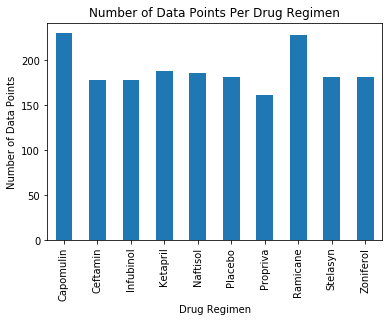

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
tumor_data_point=merged_df.groupby("Drug Regimen")["Metastatic Sites"].count()

tumor_chart=tumor_data_point.plot(kind="bar")

tumor_chart.set_ylabel("Number of Data Points")
tumor_chart.set_title("Number of Data Points Per Drug Regimen")
plt.show()

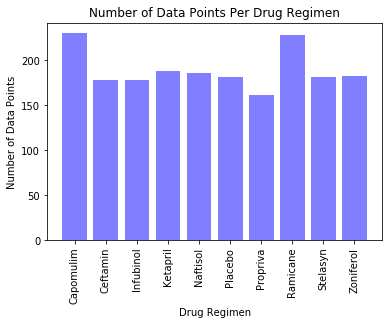

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#print(str(tumor_data_point))
meta_sites=[230,178,178,188,186,181,161,228,181,182]
drug_regimen=np.arange(len(meta_sites))

tick_locations= [value for value in drug_regimen]
plt.xticks(tick_locations,
           ["Capomulim", "Ceftamin", "Infubinol", "Ketapril", "Naftisol",
            "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"],
          rotation="vertical")

plt.bar(drug_regimen, meta_sites, color="b", alpha=0.5, align="center")

plt.title("Number of Data Points Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

## Pie plots

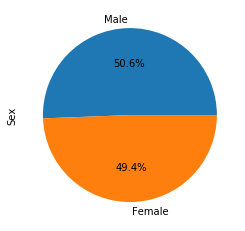

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pie=merged_df["Sex"].value_counts()

gender_pie.plot(kind="pie", autopct="%1.1f%%")

plt.show()

Text(0, 0.5, 'Sex')

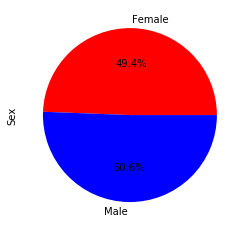

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female", "Male"]
sizes=["935", "958"]
colors=["Red", "Blue"]
explode= (0,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%")
plt.ylabel("Sex")

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
final_tumor_df= merged_df.groupby(["Mouse ID"]).max()
final_tumor_df= final_tumor_df.reset_index("Mouse ID")
final_tumor_df= final_tumor_df[["Mouse ID", "Timepoint"]]
final_tumor_df= pd.merge(final_tumor_df, merged_df, on=["Mouse ID", "Timepoint"], how="left")

final_tumor_df= final_tumor_df.loc[(final_tumor_df["Drug Regimen"]=="Capomulin") | 
                                   (final_tumor_df["Drug Regimen"]=="Ramicane")| 
                                   (final_tumor_df["Drug Regimen"]=="Infubinol")|
                                   (final_tumor_df["Drug Regimen"]=="Ceftamin")
                                  ]

final_tumor_df=final_tumor_df.set_index(["Drug Regimen"])
final_tumor_df.head()

,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Infubinol,a203,45,Female,20,23,67.973419,2
Infubinol,a251,45,Female,21,25,65.525743,1
Ceftamin,a275,45,Female,20,28,62.999356,3
Ramicane,a411,45,Male,3,22,38.407618,1
Ramicane,a444,45,Female,10,25,43.047543,0


In [9]:
tumor_volume_capo= final_tumor_df.loc["Capomulin","Tumor Volume (mm3)"]
quartiles = tumor_volume_capo.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The IQR is {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The IQR is 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [10]:
tumor_volume_ram= final_tumor_df.loc["Ramicane","Tumor Volume (mm3)"]
quartiles = tumor_volume_ram.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The IQR is {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The IQR is 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [11]:
tumor_volume_inf= final_tumor_df.loc["Infubinol","Tumor Volume (mm3)"]
quartiles = tumor_volume_inf.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The IQR is {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The IQR is 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [12]:
tumor_volume_ceft= final_tumor_df.loc["Ceftamin","Tumor Volume (mm3)"]
quartiles = tumor_volume_ceft.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The IQR is {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The IQR is 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


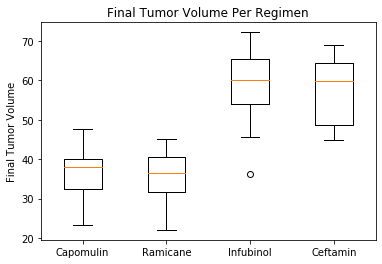

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume Per Regimen")
ax1.set_ylabel("Final Tumor Volume")
labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
ax1.boxplot([tumor_volume_capo, tumor_volume_ram, tumor_volume_inf, tumor_volume_ceft], labels=labels)
plt.show()

## Line and scatter plots

What is the Mouse ID that was treated with Capomulin?l509


Text(0.5, 1.0, 'Capomulin Treatment of Mouse l509')

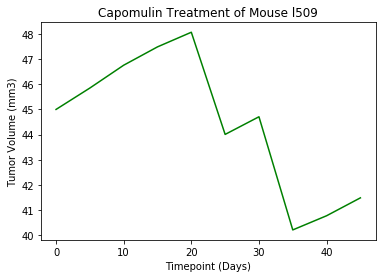

In [14]:
#Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_id_df=merged_df.set_index("Mouse ID")
capomulin_mouse=input("What is the Mouse ID that was treated with Capomulin?")

timepoint=[0,5,10,15,20,25,30,35,40,45]
tumor_volume=mouse_id_df.loc[capomulin_mouse,["Tumor Volume (mm3)"]]

plt.plot(timepoint, tumor_volume, color="green")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse " + capomulin_mouse)

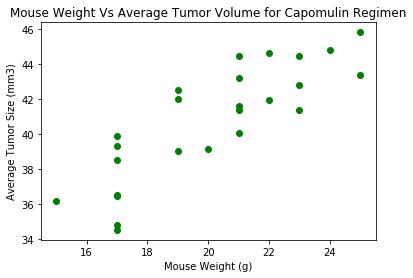

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
drug_df=merged_df.groupby(["Drug Regimen","Mouse ID"])

avg_tumor_volume=pd.DataFrame(drug_df["Tumor Volume (mm3)"].mean())
avg_tumor_volume_capo=avg_tumor_volume.loc["Capomulin"]

weight_df=pd.DataFrame(drug_df["Weight (g)"].mean())
weight_capo=weight_df.loc["Capomulin"]

plt.scatter(weight_capo, avg_tumor_volume_capo, marker="o", facecolors="green")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Size (mm3)")
plt.title("Mouse Weight Vs Average Tumor Volume for Capomulin Regimen")
plt.show()

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


<function matplotlib.pyplot.show(*args, **kw)>

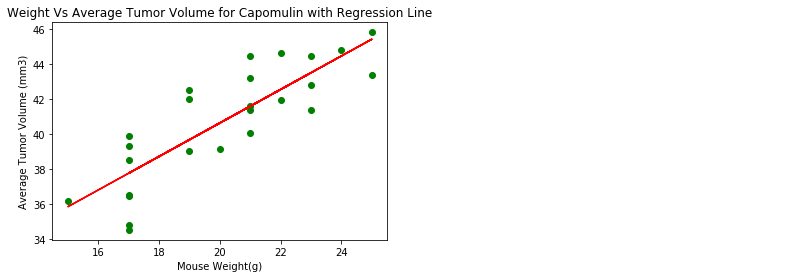

In [16]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

coef=round(st.pearsonr(weight_capo["Weight (g)"],avg_tumor_volume_capo["Tumor Volume (mm3)"])[0],2)
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {coef}")
                                                                                                                      
(slope, intercept, rvalue, pvalue, stderr)= linregress(weight_capo["Weight (g)"], avg_tumor_volume_capo["Tumor Volume (mm3)"])
regress_values= weight_capo * slope + intercept
line_eq= "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight_capo, avg_tumor_volume_capo, marker="o", facecolors="green")
plt.plot(weight_capo, regress_values, "r-")
plt.annotate(line_eq,(34, 46),fontsize=15,color="red")
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight Vs Average Tumor Volume for Capomulin with Regression Line")
plt.show